# Modelos de regresión lineal

In [2]:
# library("car") # Ginzberg data
# library("rgl")
# options(rgl.printRglwidget = TRUE)
# plot3d(depression ~ fatalism + simplicity,
#        Ginzberg, xlim = c(0, 3), zlim = c(0, 3))
# n <- 20
# x <- y <- seq(0, 3, length = n)
# region <- expand.grid(x = x, y = y)
# z <- matrix(0.2727 + 0.4178 * region$x + 0.3795 * region$y, n, n)
# surface3d(x, y, z, back = "line", front = "line",
#           col = "red", lw = 1.5, alpha = 0.4)

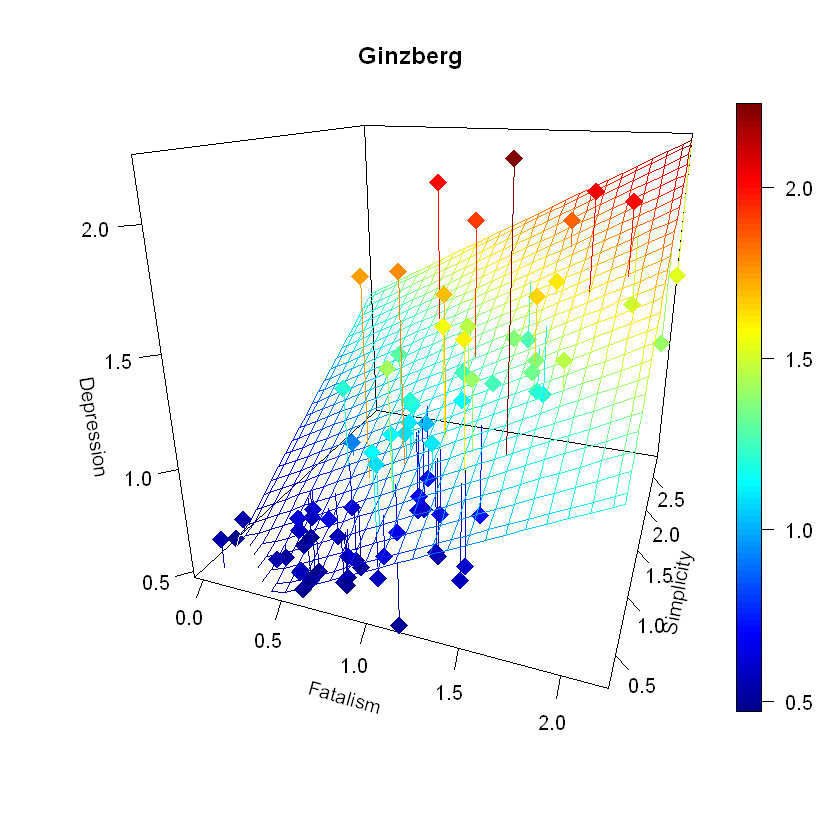

In [1]:
library("carData") # Ginzberg data
library("plot3D")

# Datos
x <- Ginzberg$fatalism
y <- Ginzberg$simplicity
z <- Ginzberg$depression

# Modelo ajustado ( z = (ax + by + d) / c)
# lm obtiene el modelo lineal ax + by + cz + d = 0
fit <- lm(z ~ x + y)

# Predicción sobre una malla regular xy
grid_lines <- 26
x_pred <- seq(min(x), max(x), length.out = grid_lines)
y_pred <- seq(min(y), max(y), length.out = grid_lines)

# Genera una maya de datos x y y para predecir z
xy <- expand.grid(x = x_pred, y = y_pred)
z_pred <- matrix(predict(fit, newdata = xy),
                 nrow = grid_lines, ncol = grid_lines)

# Puntos ajustados para las lineas sobre la superficie
fitpoints <- predict(fit)

# Scatter con plano de regresión
scatter3D(x, y, z, pch = 18, cex = 2,
          theta = 20, phi = 20, ticktype = "detailed",
          xlab = "Fatalism", ylab = "Simplicity", zlab = "Depression",
          surf = list(x = x_pred, y = y_pred, z = z_pred, facets = NA,
                      fit = fitpoints),
          main = "Ginzberg")

In [3]:
library("DAAG")
head(ais)
str(ais)

,rcc,wcc,hc,hg,ferr,bmi,ssf,pcBfat,lbm,ht,wt,sex,sport
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<fct>
1,3.96,7.5,37.5,12.3,60,20.56,109.1,19.75,63.32,195.9,78.9,f,B_Ball
2,4.41,8.3,38.2,12.7,68,20.67,102.8,21.30,58.55,189.7,74.4,f,B_Ball
3,4.14,5.0,36.4,11.6,21,21.86,104.6,19.88,55.36,177.8,69.1,f,B_Ball
4,4.11,5.3,37.3,12.6,69,21.88,126.4,23.66,57.18,185.0,74.9,f,B_Ball
5,4.45,6.8,41.5,14.0,29,18.96,80.3,17.64,53.20,184.6,64.6,f,B_Ball
6,4.10,4.4,37.4,12.5,42,21.04,75.2,15.58,53.77,174.0,63.7,f,B_Ball


'data.frame':	202 obs. of  13 variables:
 $ rcc   : num  3.96 4.41 4.14 4.11 4.45 4.1 4.31 4.42 4.3 4.51 ...
 $ wcc   : num  7.5 8.3 5 5.3 6.8 4.4 5.3 5.7 8.9 4.4 ...
 $ hc    : num  37.5 38.2 36.4 37.3 41.5 37.4 39.6 39.9 41.1 41.6 ...
 $ hg    : num  12.3 12.7 11.6 12.6 14 12.5 12.8 13.2 13.5 12.7 ...
 $ ferr  : num  60 68 21 69 29 42 73 44 41 44 ...
 $ bmi   : num  20.6 20.7 21.9 21.9 19 ...
 $ ssf   : num  109.1 102.8 104.6 126.4 80.3 ...
 $ pcBfat: num  19.8 21.3 19.9 23.7 17.6 ...
 $ lbm   : num  63.3 58.5 55.4 57.2 53.2 ...
 $ ht    : num  196 190 178 185 185 ...
 $ wt    : num  78.9 74.4 69.1 74.9 64.6 63.7 75.2 62.3 66.5 62.9 ...
 $ sex   : Factor w/ 2 levels "f","m": 1 1 1 1 1 1 1 1 1 1 ...
 $ sport : Factor w/ 10 levels "B_Ball","Field",..: 1 1 1 1 1 1 1 1 1 1 ...


In [4]:
help(ais)

ais                    package:DAAG                    R Documentation

_A_u_s_t_r_a_l_i_a_n _a_t_h_l_e_t_e_s _d_a_t_a _s_e_t

_D_e_s_c_r_i_p_t_i_o_n:

     These data were collected in a study of how data on various
     characteristics of the blood varied with sport, body size, and sex
     of the athlete.

_U_s_a_g_e:

     data(ais)
     
_F_o_r_m_a_t:

     A data frame with 202 observations on the following 13 variables.

     rcc red blood cell count, in 10^{12} l^{-1}

     wcc while blood cell count, in 10^{12} per liter

     hc hematocrit, percent

     hg hemaglobin concentration, in g per decaliter

     ferr plasma ferritins, ng dl^{-1}

     bmi Body mass index, kg cm^{-2} 10^2

     ssf sum of skin folds

     pcBfat percent Body fat

     lbm lean body mass, kg

     ht height, cm

     wt weight, kg

     sex a factor with levels 'f' 'm'

     sport a factor with levels 'B_Ball' 'Field' 'Gym' 'Netball' 'Row'
          'Sw

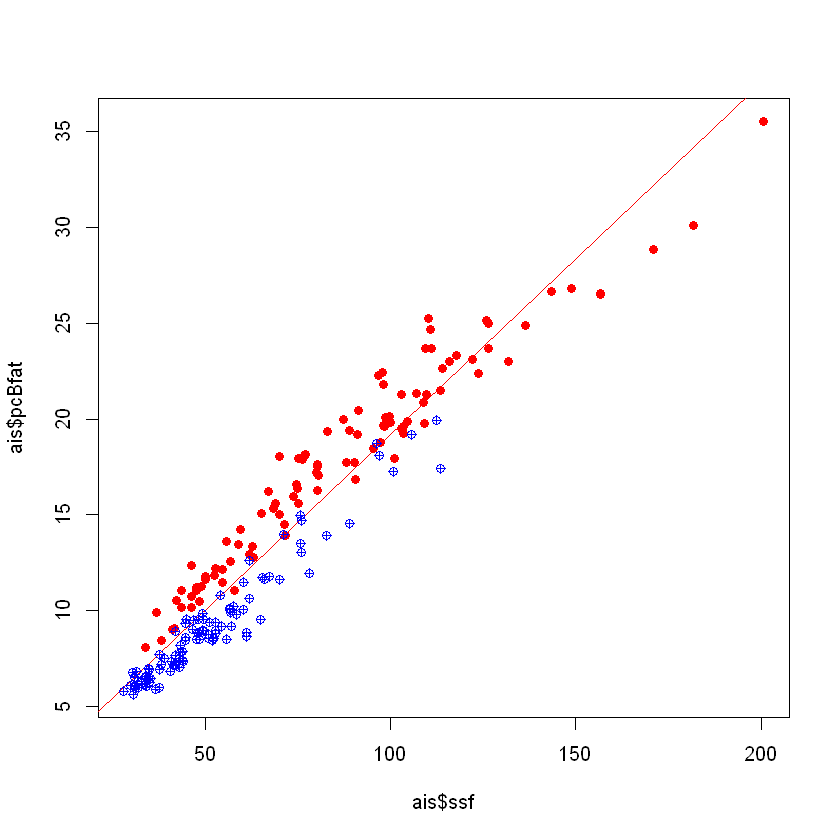

In [5]:
plot(ais$ssf, ais$pcBfat)
abline(lm(ais$pcBfat ~ ais$ssf), col = "red")
mujeres <- which(ais$sex == "f")
points(ais$ssf[mujeres], ais$pcBfat[mujeres], col = "#ff0000", pch = 16)
points(ais$ssf[-mujeres], ais$pcBfat[-mujeres], col = "blue", pch = 10)

In [8]:
str(lm(ais$pcBfat ~ ais$ssf))

List of 12
 $ coefficients : Named num [1:2] 0.873 0.183
  ..- attr(*, "names")= chr [1:2] "(Intercept)" "ais$ssf"
 $ residuals    : Named num [1:202] -1.09 1.61 -0.14 -0.35 2.07 ...
  ..- attr(*, "names")= chr [1:202] "1" "2" "3" "4" ...
 $ effects      : Named num [1:202] -191.977 -84.51 -0.18 -0.465 2.111 ...
  ..- attr(*, "names")= chr [1:202] "(Intercept)" "ais$ssf" "" "" ...
 $ rank         : int 2
 $ fitted.values: Named num [1:202] 20.8 19.7 20 24 15.6 ...
  ..- attr(*, "names")= chr [1:202] "1" "2" "3" "4" ...
 $ assign       : int [1:2] 0 1
 $ qr           :List of 5
  ..$ qr   : num [1:202, 1:2] -14.2127 0.0704 0.0704 0.0704 0.0704 ...
  .. ..- attr(*, "dimnames")=List of 2
  .. .. ..$ : chr [1:202] "1" "2" "3" "4" ...
  .. .. ..$ : chr [1:2] "(Intercept)" "ais$ssf"
  .. ..- attr(*, "assign")= int [1:2] 0 1
  ..$ qraux: num [1:2] 1.07 1.07
  ..$ pivot: int [1:2] 1 2
  ..$ tol  : num 1e-07
  ..$ rank : int 2
  ..- attr(*, "class")= chr "qr"
 $ df.residual  : int 200
 $ xlevel

In [9]:
b <- lm(ais$pcBfat ~ ais$ssf)$coefficients
b

(Intercept)     ais$ssf 
  0.8733647   0.1830445

In [10]:
lm_obj <- lm(ais$pcBfat ~ ais$ssf)
summary(lm_obj) # Resumen estadístico


Call:
lm(formula = ais$pcBfat ~ ais$ssf)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.2389 -1.1305 -0.2132  1.0160  4.3718 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 0.873365   0.276252   3.161  0.00181 ** 
ais$ssf     0.183045   0.003621  50.546  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.672 on 200 degrees of freedom
Multiple R-squared:  0.9274,	Adjusted R-squared:  0.927 
F-statistic:  2555 on 1 and 200 DF,  p-value: < 2.2e-16


In [11]:
confint(lm_obj) # Intervalos de confianza

,2.5 %,97.5 %
(Intercept),0.3286242,1.4181053
ais$ssf,0.1759036,0.1901855


In [12]:
mujeres <- as.integer(ais$sex == "f")
mujeres

[1] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [38] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [75] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0
[112] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[149] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[186] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

In [13]:
lm(ais$pcBfat ~ ais$ssf + mujeres)


Call:
lm(formula = ais$pcBfat ~ ais$ssf + mujeres)

Coefficients:
(Intercept)      ais$ssf      mujeres  
     1.1307       0.1579       2.9844  


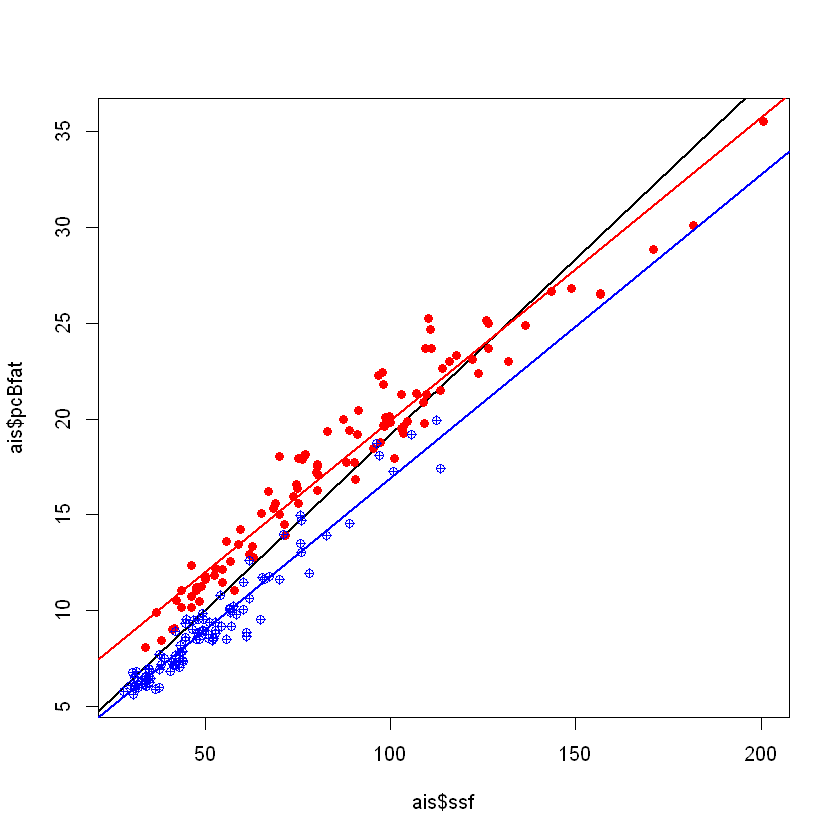

In [14]:
plot(ais$ssf, ais$pcBfat)
abline(lm(ais$pcBfat ~ ais$ssf), col = "black", lw = 2)
mujeres <- which(ais$sex == "f")
points(ais$ssf[mujeres], ais$pcBfat[mujeres], col = "#ff0000", pch = 16)
points(ais$ssf[-mujeres], ais$pcBfat[-mujeres], col = "blue", pch = 10)
abline(a = 1.1307, b = 0.1579, col = "blue", lw = 2)
abline(a = 4.1151, b = 0.1579, col = "red", lw = 2)

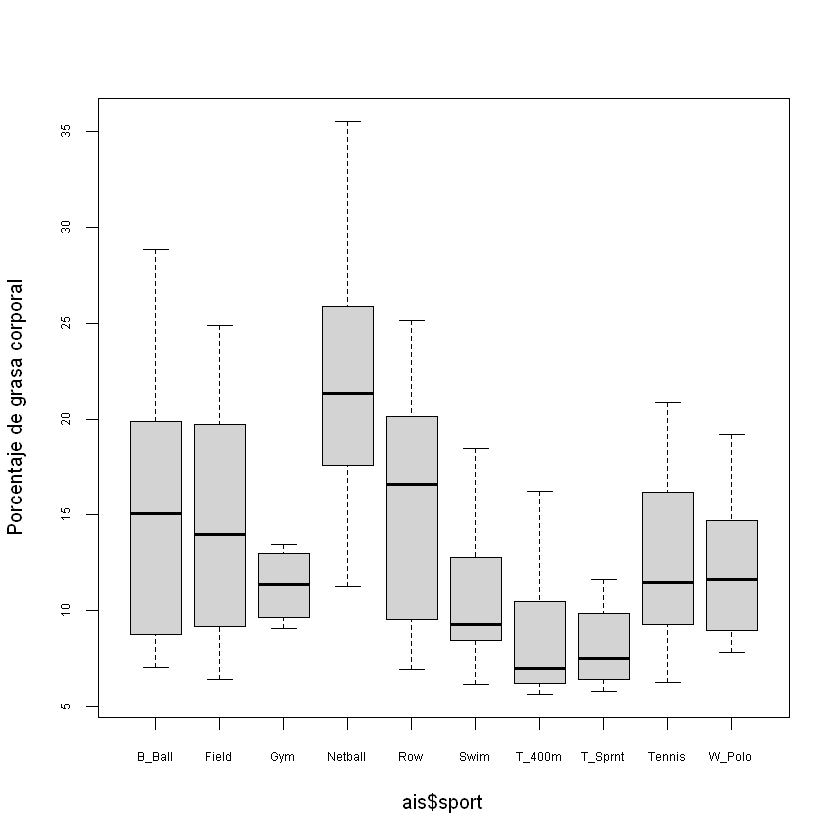

In [16]:
boxplot(ais$pcBfat ~ ais$sport, cex.axis = .6,
        ylab = "Porcentaje de grasa corporal")